<a href="https://colab.research.google.com/github/1975JHK/1975JHK.github.io/blob/main/Decision_Boundaries_by_Cost_Parameter_of_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installing the required packages
pcks <- c('e1071', 'caret', 'dplyr', 'tidyr', 'magrittr',
            'ggplot2', 'easypackages')
install.packages(pcks)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘proxy’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’




All packages loaded successfully



species            island    bill_length_mm     bill_depth_mm 
                0                 0                 2                 2 
flipper_length_mm       body_mass_g               sex 
                2                 2                11


FALSE 
 2331 

,freqRatio,percentUnique,zeroVar,nzv
,<dbl>,<dbl>,<lgl>,<lgl>
species,1.226891,0.9009009,FALSE,FALSE
island,1.325203,0.9009009,FALSE,FALSE
bill_length_mm,1.166667,48.9489489,FALSE,FALSE
bill_depth_mm,1.200000,23.7237237,FALSE,FALSE
flipper_length_mm,1.235294,16.2162162,FALSE,FALSE
body_mass_g,1.200000,27.9279279,FALSE,FALSE
sex,1.018182,0.6006006,FALSE,FALSE



   Adelie Chinstrap    Gentoo 
      146        68       119 


   Biscoe     Dream Torgersen 
      163       123        47 

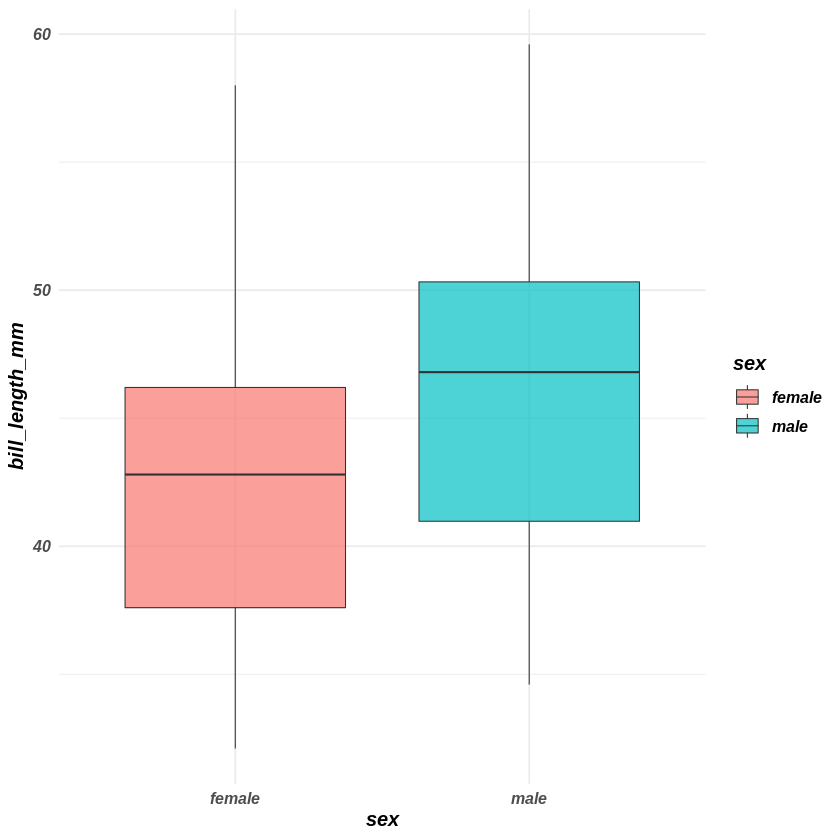

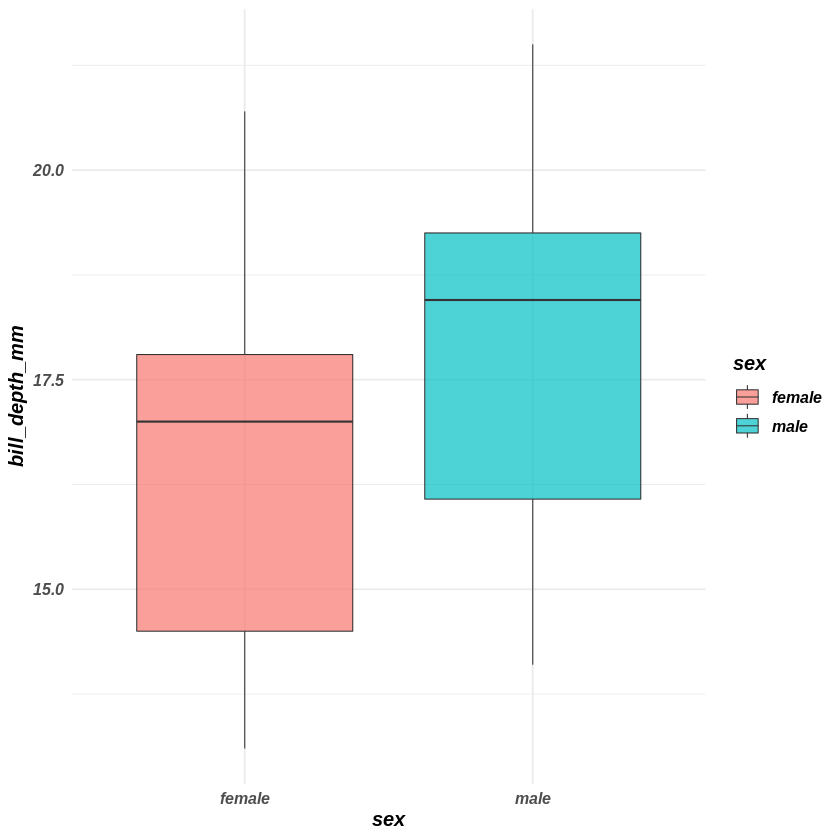

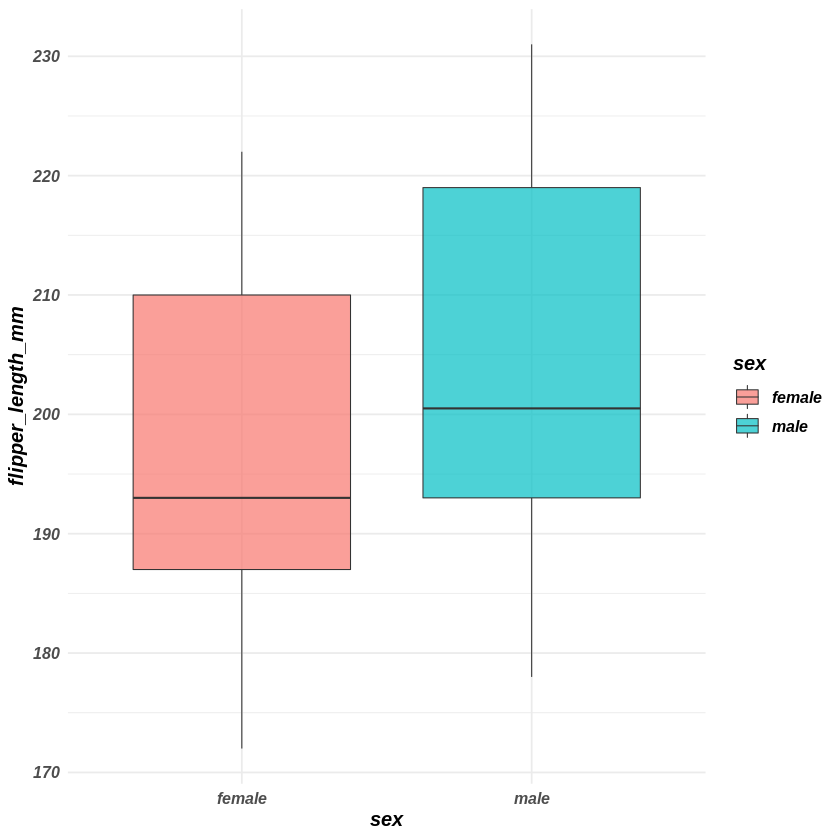

[1] 233   3

[1] 100   3

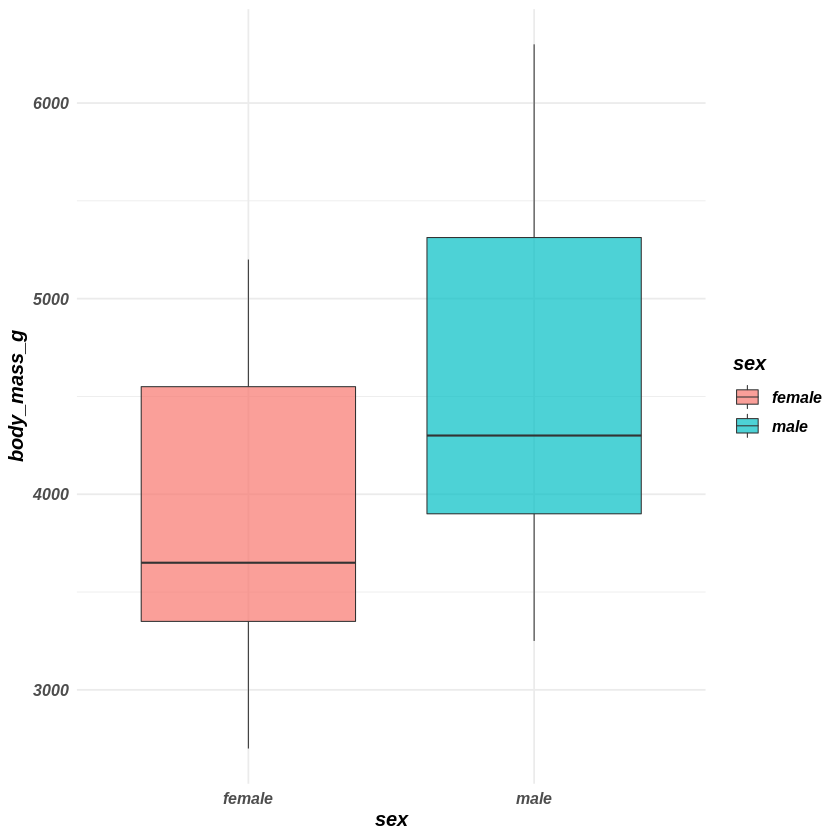

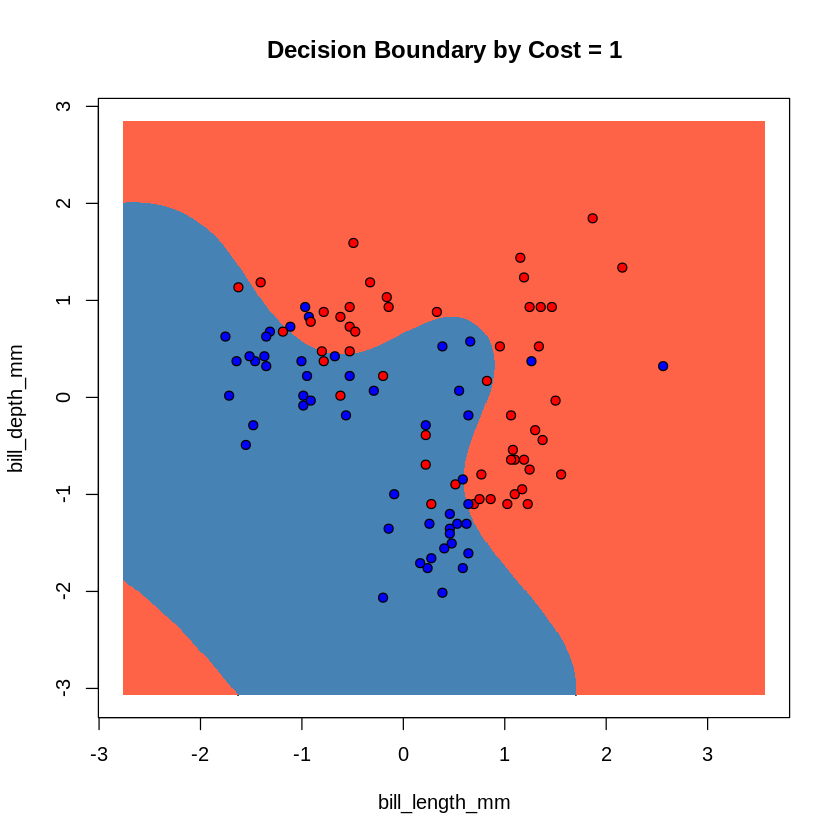

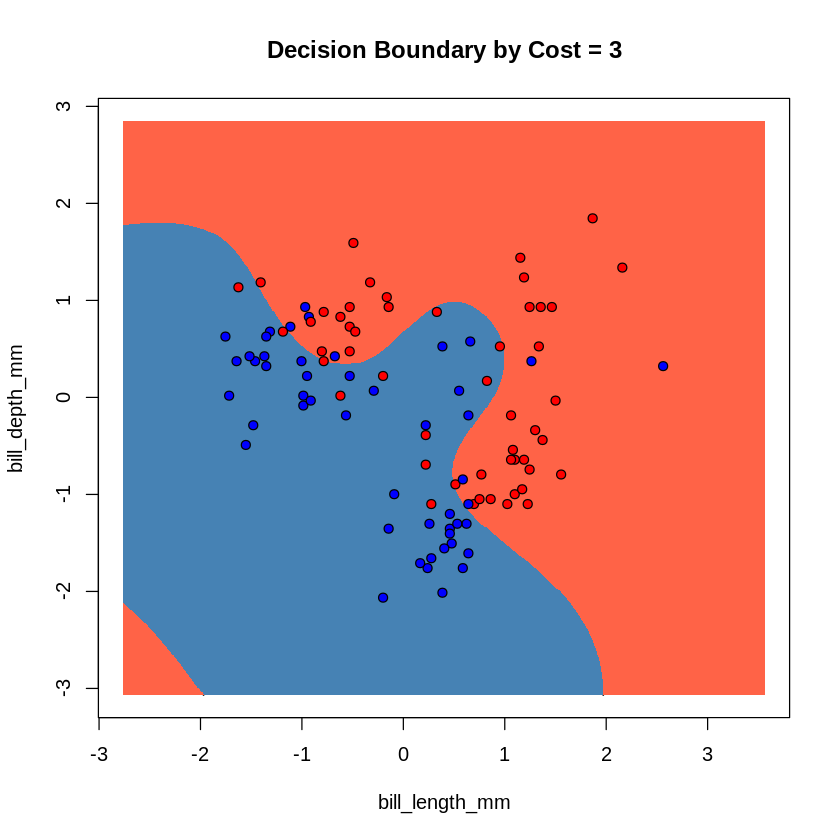

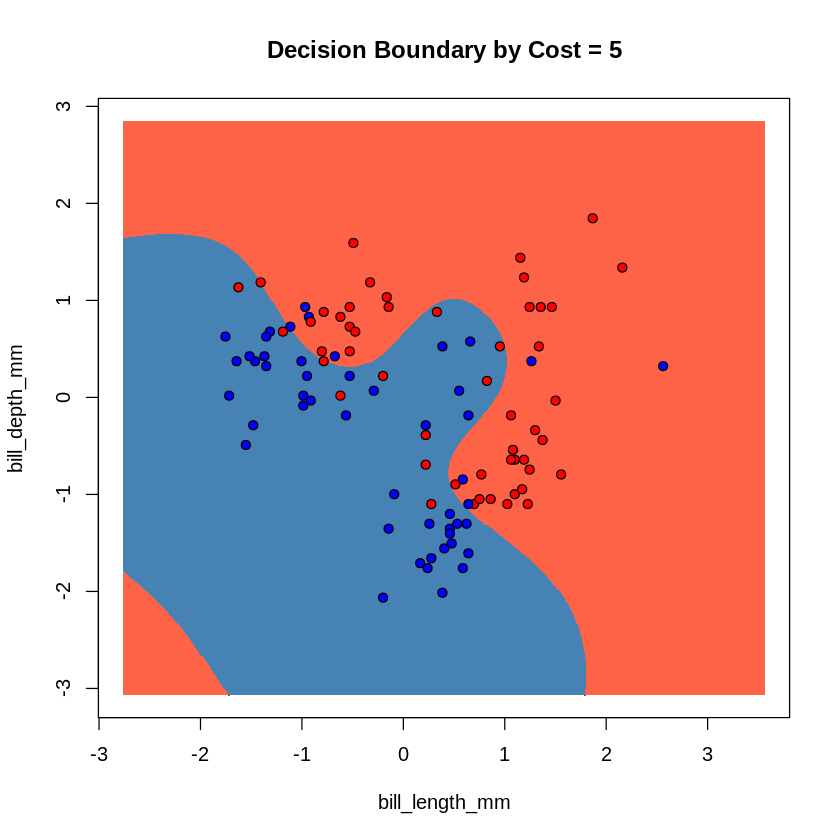

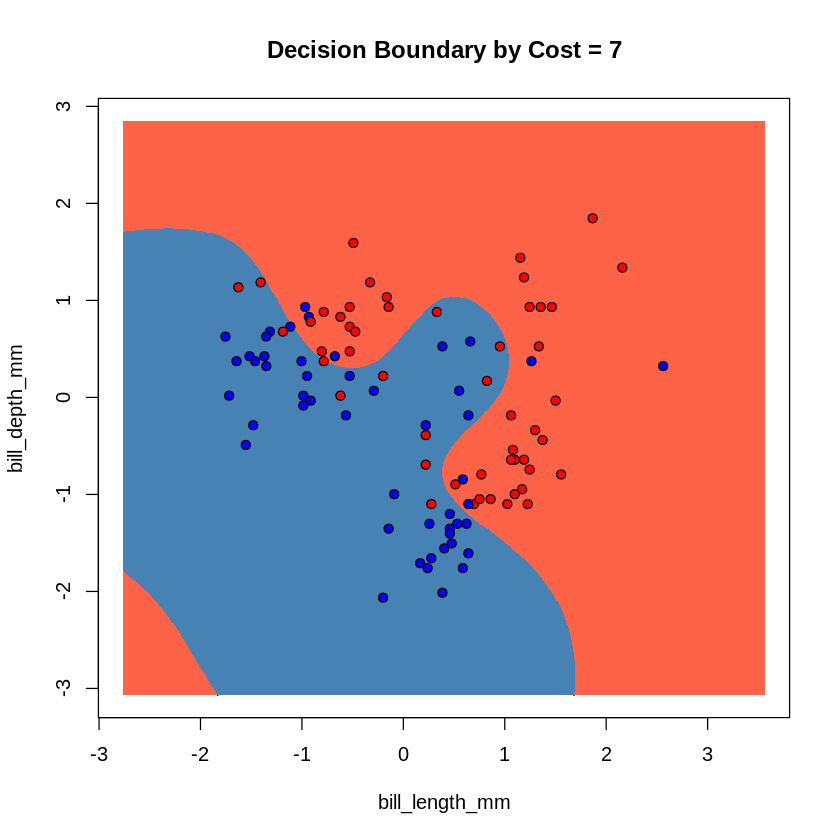

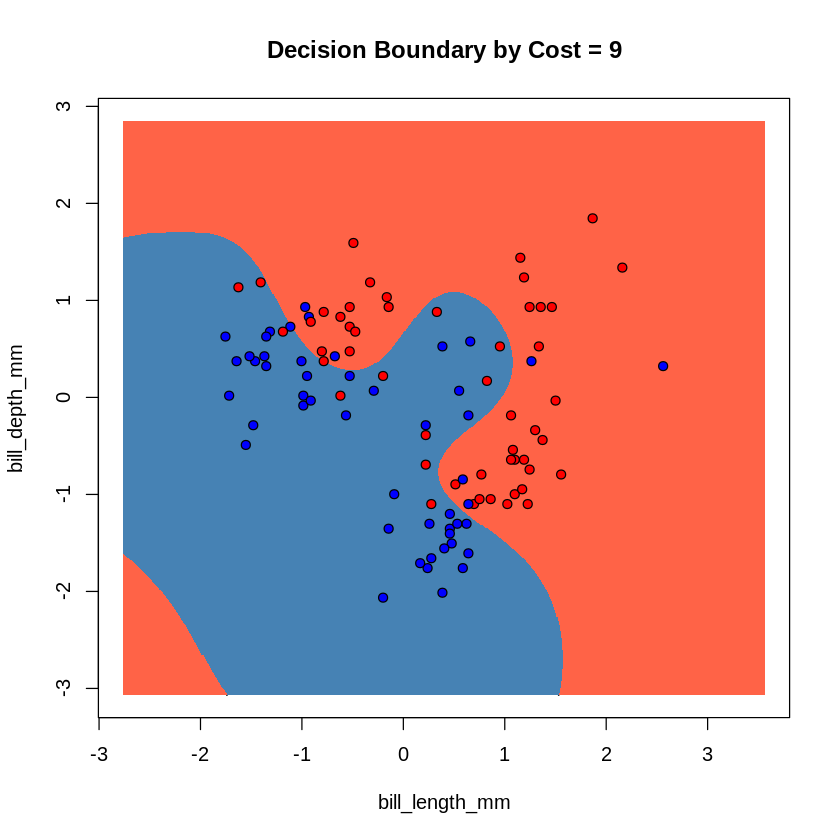

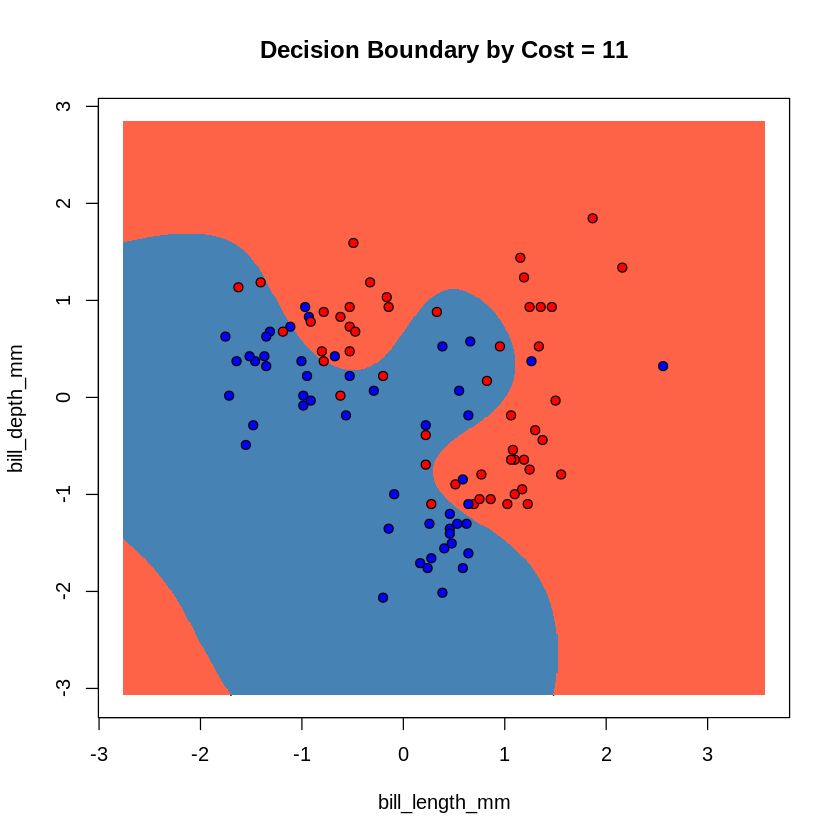

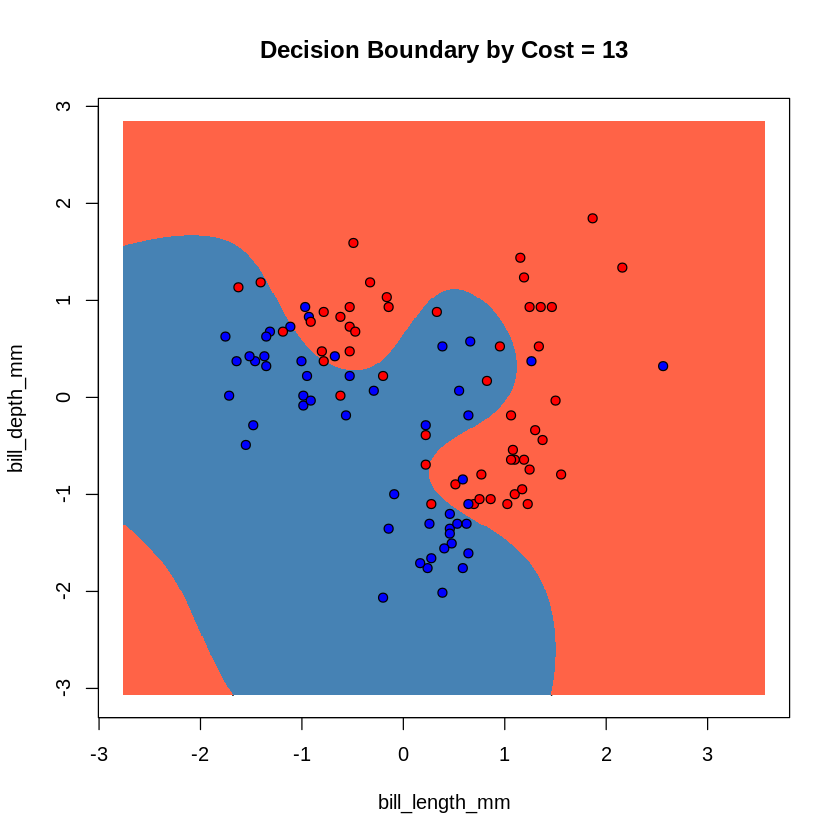

In [2]:
# Observation on the decision boundary by cost parameter of SVM
# August 28, 2021
# JH Kim

# Loading the required packages
library(easypackages)
libraries(c('e1071', 'caret', 'dplyr', 'tidyr', 'magrittr',
            'ggplot2'))

# Setting up environments
Sys.setenv(LANG = 'en')
theme_set(new = theme_minimal())
options(warn = -1)


# Importing the dataset
raw <- read.csv('/content/Penguins.csv')[-1]
#str(raw)

# Preprocessing the dataset
## Removing NAs
apply(raw, 2, function(x) sum(is.na(x)))
df <- na.omit(raw)
table(is.na(df))

## Removing Near Zero Variances
nearZeroVar(df, saveMetrics = T) # make no sense on char, factor var

## Encoding character type
table(df$species)
table(df$island)
df$species <- factor(df$species, 
                     levels = c('Adelie', 'Chinstrap', 'Gentoo'),
                     labels = c('Adelie', 'Chinstrap', 'Gentoo'))
df$island <- factor(df$island,
                    levels = c('Biscoe', 'Dream', 'Torgersen'),
                    labels = c('Biscoe', 'Dream', 'Torgersen'))

df$sex <- factor(df$sex,
                 levels = c('female', 'male'),
                 labels = c('female', 'male'))

#str(df)


# Feature Engineering
## EDA
for(i in 3:6){
  plot <- ggplot(data = df, aes(x = sex , y = df[ , i],
                        fill = sex))+
    geom_boxplot(size = 0.3, alpha = 0.7)+
    labs(y = names(df)[i])+
    theme(text = element_text(size = 12, face = 'bold.italic'))
  print(plot)
  }

## Feature Selection
new_df <- df[ , c(3:4, 7)]
#str(new_df)

# Scaling features
mean <- apply(new_df[ , 1:2], 2, mean)
sd <- apply(new_df[ , 1:2], 2, sd)
new_df[ , -3] <- scale(new_df[ , -3], center = mean, scale = sd)


# Splitting dataset
set.seed(1975)
index <- sample(1:nrow(new_df), nrow(new_df)*0.7, replace = F)
train <- new_df[index, ]
test <- new_df[-index, ]
dim(train)
dim(test)

# Modeling with SVM
cost <- seq(1, 13, by = 2)
type <- 'C-classification'
kernel <- 'radial'

for(i in cost){
  model <- svm(sex ~ ., 
               data = train,
               cost = i,
               type = type,
               kernel = kernel)
  
  x1 <- seq(min(test[ , 1])-1, max(test[ , 1])+1, by = 0.01)
  x2 <- seq(min(test[ , 2])-1, max(test[ , 2])+1, by = 0.01)
  grid.set <- expand.grid(x1, x2)
  colnames(grid.set) <- c('bill_length_mm', 'bill_depth_mm')
  y.grid <- predict(model, newdata = grid.set)
  plot(test[ , 1:2],
       main = paste('Decision Boundary by Cost','=', i),
       xlabs = 'bill_length_mm',
       ylabs = 'bill_depth_mm',
       xlim = range(x1), ylim = range(x2))
  
  contour(x1, x2, matrix(as.numeric(y.grid), length(x1), length(x2)), add = T)
  points(grid.set, pch = 46, col = ifelse(y.grid == 'female', 'steelblue', 'tomato'))
  points(test, pch = 21, bg = ifelse(test[ , 3] == 'female', 'blue', 'red'))
  text(x = 4, y = 3, color = 'red')
}